# <u>LOAN PREDICTION</u>

## Caso de uso

<img src = 'https://datahack-prod.s3.ap-south-1.amazonaws.com/__sized__/contest_cover/loanpre-thumbnail-1200x1200.png'>

### Importación de librerías iniciales

In [1]:
import warnings
warnings.filterwarnings("ignore")

#Importar las librerías necesarias en Python.
import pandas as pd      ## Manejo de dataframes o set de datos
import numpy as np       ## Todo lo referente a trabajar con vectores y matrices
from scipy import stats  ## Herramientas y algoritmos matemáticos para python

import seaborn as sns
import matplotlib.pyplot as plt

Usamos una semilla a lo largo de todo el notebook para los procesos aleatorios

In [2]:
seed = 2023

In [3]:
target = 'Loan_Status'

El estado del préstamo puede tener dos valores: Sí o NO. 

Sí: si se aprueba el préstamo 

NO: si no se aprueba el préstamo 

Entonces, al usar el conjunto de datos de entrenamiento, entrenaremos nuestro modelo e intentaremos predecir nuestra columna de destino que es "Loan_Status" en el conjunto de datos de prueba.

### **Lectura Inicial de base de datos**

Utilizaremos las bases de este caso ya preprocesadas en el notebook 1 Procesamiento de datos. Estas bases ya recibieron el siguiente tratamiento previo:

1. División train test 80/20
2. Tratamiento de nulos
3. Labeling de variables
4. Encoding de variables categóricas (dummys)
5. Tratamiento de valores extremos y outliers
6. Creación de nuevas variables
7. Reescalamiento final de la base


In [4]:
train = pd.read_csv('data/train_preprocesed.csv')
test = pd.read_csv('data/test_preprocesed.csv')

In [5]:
# Vemos la dimensionalidad de la base train
train.shape

(491, 19)

In [6]:
# Vemos la dimensionalidad de la base test
test.shape

(123, 19)

In [7]:
# Visualizacion Global de los datos train
train.head()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,TotalIncome,TotalIncomeByPerson,Cuota,%Cuota,log_ApplicantIncome,log_TotalIncome,Loan_Status
0,0.000000,0.041586,0.046296,0.094067,0.729730,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.060630,0.092567,0.042180,0.036690,0.211970,0.296906,0
1,0.000000,0.046800,0.000000,0.130246,0.729730,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.016873,0.040946,0.058404,0.098886,0.230720,0.116246,1
2,0.666667,0.651745,0.024336,0.204052,0.729730,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.390230,0.146999,0.091499,0.013618,0.872503,0.737429,0
3,1.000000,0.087040,0.000000,0.150507,0.729730,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.040073,0.001930,0.067489,0.076764,0.346811,0.225431,0
4,0.666667,0.011521,0.026064,0.011577,0.189189,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.022861,0.002538,0.027255,0.042599,0.074347,0.148516,0


In [8]:
# Visualizacion Global de los datos test
test.head()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,TotalIncome,TotalIncomeByPerson,Cuota,%Cuota,log_ApplicantIncome,log_TotalIncome,Loan_Status
0,0.000000,0.062021,0.0000,0.106383,1.000000,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.029159,0.083882,0.010929,0.054989,0.279810,0.119676,1
1,0.000000,0.221089,0.2208,0.306738,0.743590,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.385990,0.420599,0.052520,0.033955,0.569021,0.677390,1
2,0.000000,0.209189,0.0000,0.186170,0.743590,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.181483,0.227620,0.031876,0.042957,0.554557,0.455514,0
3,0.000000,0.100285,0.0000,0.092199,0.743590,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.068764,0.121254,0.015786,0.048193,0.377229,0.238757,0
4,0.333333,0.124588,0.0000,0.024823,0.487179,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.093919,0.063101,0.011840,0.032302,0.426368,0.298821,0


Almacenamos la columna Loan_Status (target) en y_train y y_test respectivamente

In [9]:
X_train = train.drop(target, axis =1)
y_train = train[target]

X_test = test.drop(target, axis =1)
y_test = test[target]

### Regresion Logistica Binaria

In [18]:
# %pip install scikit-learn

In [17]:
# Paso N°01: Elegimos y entrenamos un algoritmo de ML
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

hiperparámetros del modelo estimado

In [19]:
lr.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'deprecated',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

ENTRENAMIENTO !!!

In [20]:
lr.fit(X_train,y_train)

LogisticRegression()

In [21]:
# variables
lr.feature_names_in_

array(['Dependents', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Gender_Male', 'Married_Yes',
       'Education_Not Graduate', 'Self_Employed_Yes',
       'Property_Area_Semiurban', 'Property_Area_Urban', 'TotalIncome',
       'TotalIncomeByPerson', 'Cuota', '%Cuota', 'log_ApplicantIncome',
       'log_TotalIncome'], dtype=object)

In [22]:
# coeficientes del modelo
lr.coef_

array([[-0.04284835,  0.03080728,  0.41963307,  0.22137339,  0.0771115 ,
        -3.35715756, -0.09464721, -0.54820534,  0.38957282, -0.02536092,
        -0.87558591, -0.02239273,  0.44013065,  0.68596954,  0.66885   ,
         0.85168078,  0.05926561, -0.44401601]])

In [23]:
# clases que tenemos
lr.classes_

array([0, 1], dtype=int64)

Estimaciones de probabilidad. Las estimaciones devueltas para todas las clases están ordenadas por la etiqueta de clases.
Es decir, la probabilidad que pertenesca a la clase 0 son los valores de la primera columna (indice 0)
Mientras que la probabilidad de pertenesca a la clase 1 son los valores de la segunda columna (indice 1)

In [24]:
lr.predict_proba(X_test)

array([[0.83606227, 0.16393773],
       [0.05249555, 0.94750445],
       [0.67634545, 0.32365455],
       [0.67033079, 0.32966921],
       [0.81298233, 0.18701767],
       [0.6959975 , 0.3040025 ],
       [0.89757437, 0.10242563],
       [0.67936815, 0.32063185],
       [0.89758495, 0.10241505],
       [0.86944441, 0.13055559],
       [0.90641883, 0.09358117],
       [0.79144462, 0.20855538],
       [0.80287644, 0.19712356],
       [0.82055052, 0.17944948],
       [0.78431474, 0.21568526],
       [0.72753877, 0.27246123],
       [0.77568739, 0.22431261],
       [0.12481375, 0.87518625],
       [0.79742328, 0.20257672],
       [0.83536232, 0.16463768],
       [0.86518956, 0.13481044],
       [0.69019765, 0.30980235],
       [0.76020731, 0.23979269],
       [0.69287872, 0.30712128],
       [0.79981426, 0.20018574],
       [0.80846707, 0.19153293],
       [0.66737519, 0.33262481],
       [0.73384721, 0.26615279],
       [0.78062982, 0.21937018],
       [0.90751669, 0.09248331],
       [0.

Predicción de la probabilidad de Loan_Status = 1

In [25]:
lr.predict_proba(X_test)[:,1]

array([0.16393773, 0.94750445, 0.32365455, 0.32966921, 0.18701767,
       0.3040025 , 0.10242563, 0.32063185, 0.10241505, 0.13055559,
       0.09358117, 0.20855538, 0.19712356, 0.17944948, 0.21568526,
       0.27246123, 0.22431261, 0.87518625, 0.20257672, 0.16463768,
       0.13481044, 0.30980235, 0.23979269, 0.30712128, 0.20018574,
       0.19153293, 0.33262481, 0.26615279, 0.21937018, 0.09248331,
       0.74627198, 0.9560185 , 0.22927793, 0.27093846, 0.36091242,
       0.95150065, 0.89005295, 0.19228008, 0.41280265, 0.77524191,
       0.12512276, 0.32953616, 0.09925011, 0.2574298 , 0.35262023,
       0.31433267, 0.43106262, 0.10946403, 0.2175836 , 0.23202043,
       0.92157406, 0.24375024, 0.32343995, 0.83398521, 0.33621294,
       0.09747442, 0.29074313, 0.12774112, 0.88478135, 0.10831721,
       0.34904755, 0.28659461, 0.93182744, 0.20030308, 0.52587191,
       0.2065963 , 0.21131077, 0.92565468, 0.22392139, 0.40864649,
       0.20185693, 0.20453429, 0.35968174, 0.17050156, 0.42813

predicción de la categoría

In [26]:
lr.predict(X_test)

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1], dtype=int64)

In [27]:
# Paso N°02: Con el algoritmo entrenado predecimos sobre la data de train y test!

y_pred_train=lr.predict(X_train) # Prediccion sobre el train
y_pred_test= lr.predict(X_test) # Prediccion sobre el test

y_proba_test= lr.predict_proba(X_test)[:,1]   #Prediccion de probabilidades del target

In [28]:
# Paso N°03: Revisamos las metricas de validación!
from sklearn import metrics as metrics

In [29]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html
VN, FP, FN, VP = metrics.confusion_matrix(y_train,y_pred_train).ravel()

In [30]:
VN

332

In [31]:
FP

5

In [32]:
FN

87

In [33]:
VP

67

In [34]:

def metricas_confusion(y_train,y_pred_train,y_test,y_pred_test):
    # Matriz de confusion
    print("Matriz confusion: Train")
    cm_train = metrics.confusion_matrix(y_train,y_pred_train)
    print(cm_train)

    print("Matriz confusion: Test")
    cm_test = metrics.confusion_matrix(y_test,y_pred_test)
    print(cm_test)

    # Accuracy
    print("Accuracy: Train")
    accuracy_train=metrics.accuracy_score(y_train,y_pred_train)
    print(accuracy_train)

    print("Accuracy: Test")
    accuracy_test=metrics.accuracy_score(y_test,y_pred_test)
    print(accuracy_test)

    # Precision o Aporte del Modelo
    print("Precision: Train")
    precision_train=metrics.precision_score(y_train,y_pred_train)
    print(precision_train)

    print("Precision: Test")
    precision_test=metrics.precision_score(y_test,y_pred_test)
    print(precision_test)

    # Recall o Sensibilidad 
    print("Recall: Train")
    recall_train=metrics.recall_score(y_train,y_pred_train)
    print(recall_train)

    print("Recall: Test")
    recall_test=metrics.recall_score(y_test,y_pred_test)
    print(recall_test)

In [35]:
metricas_confusion(y_train,y_pred_train,y_test,y_pred_test)

Matriz confusion: Train
[[332   5]
 [ 87  67]]
Matriz confusion: Test
[[81  4]
 [21 17]]
Accuracy: Train
0.8126272912423625
Accuracy: Test
0.7967479674796748
Precision: Train
0.9305555555555556
Precision: Test
0.8095238095238095
Recall: Train
0.43506493506493504
Recall: Test
0.4473684210526316


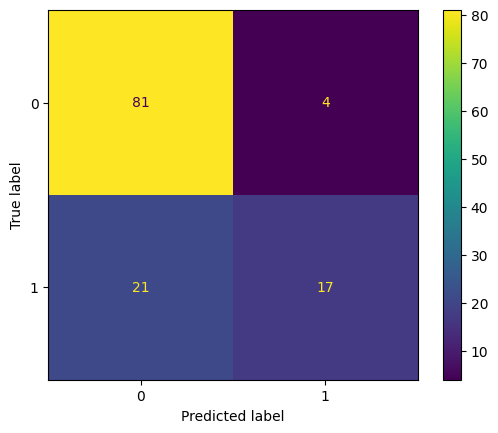

In [36]:
# Mostrando la matriz de confusión para el conjunto de test
cm = metrics.confusion_matrix(y_test,y_pred_test, labels=lr.classes_)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=lr.classes_)
disp.plot()
plt.show()

In [37]:
from sklearn.metrics import classification_report

print(metrics.classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.79      0.95      0.87        85
           1       0.81      0.45      0.58        38

    accuracy                           0.80       123
   macro avg       0.80      0.70      0.72       123
weighted avg       0.80      0.80      0.78       123



In [38]:
from sklearn.metrics import roc_auc_score, roc_curve

def plot_roc_curve(y, y_proba, label = ''):
    '''
    dibujar la curva roc para las probabilidades y target entregados
    
    params:
    y: etiquetas originales
    y_proba: probabilidades resultado del modelo
    '''
    
    auc_roc = roc_auc_score(y, y_proba)
    fpr, tpr, thresholds = roc_curve(y, y_proba)
    
    plt.figure(figsize=(8,6))
    plt.rcParams.update({'font.size': 12})
    plt.plot(fpr, fpr, c = 'red')
    plt.plot(fpr, tpr, label= (f"Curva ROC {label} (AUC = {auc_roc:.4f})"))
    plt.xlabel("FPR")
    plt.ylabel("TPR")
    plt.title(f"Curva ROC {label}")
    plt.legend(loc=4, numpoints=1)

In [39]:
# ROC AUC
roc_auc_score(y_test, y_proba_test)

0.7436532507739938

### Gráfica Curva ROC 

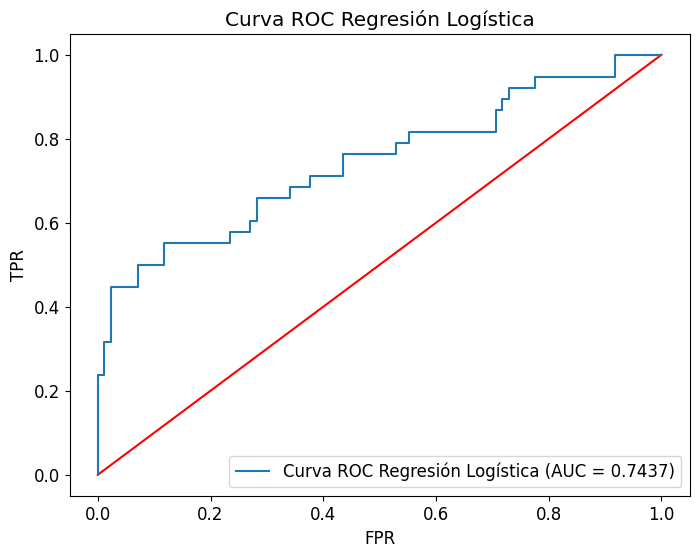

In [40]:
plot_roc_curve(y_test, y_proba_test, 'Regresión Logística')

### Ejecutando con varios optimizadores y reguladores
Construiremos el modelo de Regresión logística nuevamente para el mismo conjunto de datos, pero esta vez, usa diferentes valores de <b>solver</b> y <b>regularization</b>. Con esto podemos hacer comparaciones de varios modelos hasta encontrar el más adecuado:

In [41]:
from sklearn import metrics

Encontramos la mejor combinacion de solver y valor de C que maximice la precision y el AUC

## DATO
El valor C en la regresión logística es el inverso de la fuerza de regularización. Representa la tolerancia del modelo a errores. Un valor de C más pequeño implica una regularización más fuerte, lo que puede prevenir el sobreajuste pero también puede llevar a un subajuste si es demasiado pequeño.

In [43]:
# Parametros: 
# C: Inverso de la fuerza de regularización; debe ser un flotador positivo. Al igual que en las máquinas de vectores de 
# soporte, los valores más pequeños especifican una regularización más fuerte.

solvers=['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
Cs=[0.01,0.02,0.05,0.1]

for s in solvers:
    for c in Cs:
        LR = LogisticRegression(C=c, solver=s).fit(X_train,y_train)
        yhat = LR.predict(X_test)
        yhat_prob = LR.predict_proba(X_test)[:,1]
        print("Solver = "+s+", C = "+str(c)+
              " ->Accuracy : "+str(metrics.accuracy_score(y_test, yhat)) +
             " ->AUC : "+str(roc_auc_score(y_test, yhat_prob)))

Solver = newton-cg, C = 0.01 ->Accuracy : 0.6910569105691057 ->AUC : 0.7111455108359133
Solver = newton-cg, C = 0.02 ->Accuracy : 0.7073170731707317 ->AUC : 0.7173374613003096
Solver = newton-cg, C = 0.05 ->Accuracy : 0.7804878048780488 ->AUC : 0.7207430340557275
Solver = newton-cg, C = 0.1 ->Accuracy : 0.8130081300813008 ->AUC : 0.7244582043343654
Solver = lbfgs, C = 0.01 ->Accuracy : 0.6910569105691057 ->AUC : 0.7120743034055728
Solver = lbfgs, C = 0.02 ->Accuracy : 0.7073170731707317 ->AUC : 0.7173374613003096
Solver = lbfgs, C = 0.05 ->Accuracy : 0.7804878048780488 ->AUC : 0.7207430340557275
Solver = lbfgs, C = 0.1 ->Accuracy : 0.8130081300813008 ->AUC : 0.7244582043343654
Solver = liblinear, C = 0.01 ->Accuracy : 0.6910569105691057 ->AUC : 0.7043343653250775
Solver = liblinear, C = 0.02 ->Accuracy : 0.7073170731707317 ->AUC : 0.7139318885448916
Solver = liblinear, C = 0.05 ->Accuracy : 0.7723577235772358 ->AUC : 0.7272445820433435
Solver = liblinear, C = 0.1 ->Accuracy : 0.8130081

In [44]:
max_accuracy = metrics.accuracy_score(y_test, yhat)

In [45]:
# max = tr(metrics.accuracy_score(y_test, yhat))
# max_accuracy = max(metrics.accuracy_score(y_test, yhat))
print("Precisión máxima:", max_accuracy)

Precisión máxima: 0.8130081300813008


## Probando Decision Tree

In [46]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [47]:
clf = DecisionTreeClassifier(random_state = 2)
model_dt = clf.fit(X_train, y_train) 

In [48]:
pred = model_dt.predict(X_test)

In [49]:
print(metrics.classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.76      0.55      0.64        85
           1       0.38      0.61      0.46        38

    accuracy                           0.57       123
   macro avg       0.57      0.58      0.55       123
weighted avg       0.64      0.57      0.59       123



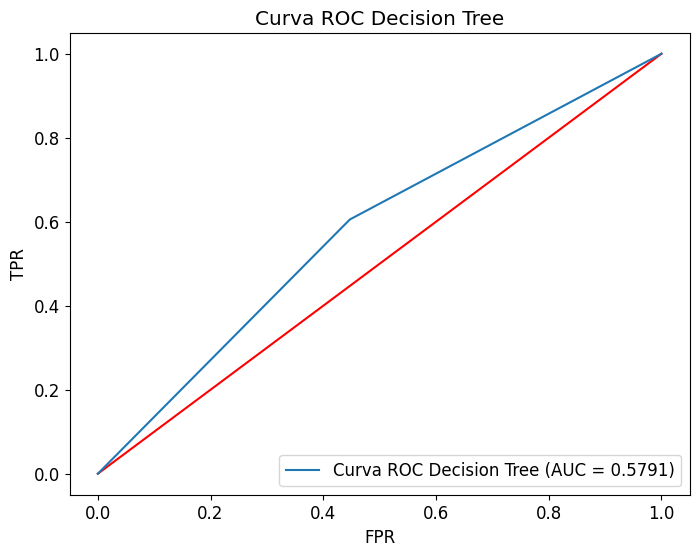

In [50]:
y_proba_test = model_dt.predict_proba(X_test)[:,1]
plot_roc_curve(y_test, y_proba_test, 'Decision Tree')

## Probando Random Forest

In [51]:
from sklearn.ensemble import RandomForestClassifier

In [52]:
rfc = RandomForestClassifier(max_depth = 25, random_state = 0)
model_rfc = rfc.fit(X_train, y_train)
pred_rfc = model_rfc.predict(X_test)

In [53]:
print(metrics.classification_report(y_test, pred_rfc))

              precision    recall  f1-score   support

           0       0.82      0.87      0.85        85
           1       0.67      0.58      0.62        38

    accuracy                           0.78       123
   macro avg       0.74      0.72      0.73       123
weighted avg       0.77      0.78      0.78       123



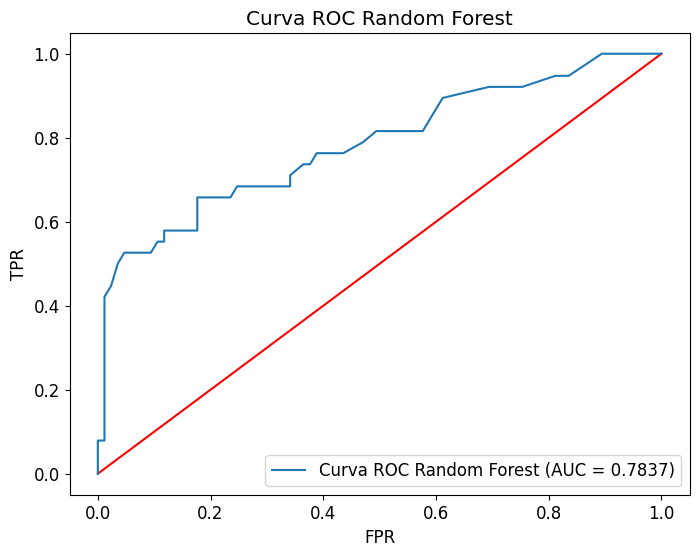

In [54]:
y_proba_test = model_rfc.predict_proba(X_test)[:,1]
plot_roc_curve(y_test, y_proba_test, 'Random Forest')

## Solidificando

### Implementacion de Validacion Cruzada

La validación cruzada es una técnica utilizada para evaluar la capacidad de generalización de un modelo de Machine Learning. Consiste en dividir el conjunto de datos en múltiples segmentos (o "folds") y entrenar el modelo varias veces, cada vez utilizando un segmento diferente como conjunto de prueba y el resto como conjunto de entrenamiento. Esto proporciona una estimación más robusta del rendimiento del modelo al evitar el sobreajuste y asegurando que el modelo se evalúe en diferentes subconjuntos de datos.

In [61]:
from sklearn.model_selection import cross_val_score

In [62]:
# Definir los modelos usados
models = {
    'Logistic Regression': LogisticRegression(C=0.1, solver='liblinear', random_state=seed),
    'Decision Tree': DecisionTreeClassifier(random_state=seed),
    'Random Forest': RandomForestClassifier(random_state=seed)
}

# Realizar validación cruzada y mostrar resultados
for name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='roc_auc')
    print(f"{name} - Cross-validated AUC scores: {scores}")
    print(f"{name} - Mean AUC score: {scores.mean()}\n")

Logistic Regression - Cross-validated AUC scores: [0.83206831 0.85637255 0.7072701  0.69571497 0.77804526]
Logistic Regression - Mean AUC score: 0.7738942384849944

Decision Tree - Cross-validated AUC scores: [0.61551233 0.66372549 0.57655272 0.69571497 0.76528647]
Decision Tree - Mean AUC score: 0.6633583977644981

Random Forest - Cross-validated AUC scores: [0.76660342 0.78137255 0.67164179 0.80067405 0.81078479]
Random Forest - Mean AUC score: 0.7662153180964248



### Optimización de Hiperparámetros con GridSearchCV

La optimización de hiperparámetros con GridSearchCV es una técnica que permite encontrar la mejor combinación de parámetros para un modelo de Machine Learning. GridSearchCV realiza una búsqueda exhaustiva en un espacio de hiperparámetros especificado y evalúa cada combinación utilizando validación cruzada.

In [63]:
from sklearn.model_selection import GridSearchCV


In [64]:
# Definir los modelos y sus respectivos espacios de hiperparámetros
param_grids = {
    'Logistic Regression': {
        'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
        'C': [0.01, 0.02, 0.05, 0.1, 1.0, 10.0]
    },
    'Decision Tree': {
        'max_depth': [None, 10, 20, 30, 40, 50],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    },
    'Random Forest': {
        'n_estimators': [100, 200, 300],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    }
}

models = {
    'Logistic Regression': LogisticRegression(random_state=seed),
    'Decision Tree': DecisionTreeClassifier(random_state=seed),
    'Random Forest': RandomForestClassifier(random_state=seed)
}

# Realizar GridSearchCV para cada modelo
for name, model in models.items():
    print(f"Optimizing {name}...")
    grid_search = GridSearchCV(model, param_grids[name], cv=5, scoring='roc_auc', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    print(f"Best parameters for {name}: {grid_search.best_params_}")
    print(f"Best cross-validated AUC score for {name}: {grid_search.best_score_}\n")


Optimizing Logistic Regression...
Best parameters for Logistic Regression: {'C': 0.05, 'solver': 'sag'}
Best cross-validated AUC score for Logistic Regression: 0.7828614045521916

Optimizing Decision Tree...
Best parameters for Decision Tree: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 10}
Best cross-validated AUC score for Decision Tree: 0.7409591983158212

Optimizing Random Forest...
Best parameters for Random Forest: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100}
Best cross-validated AUC score for Random Forest: 0.7914995232565822



### Comparacion de Multiples Modelos

In [68]:
import sklearn
print(sklearn.__version__)

1.5.1


Logistic Regression -> Accuracy: 0.8130 -> AUC: 0.7359
Decision Tree -> Accuracy: 0.6016 -> AUC: 0.6015
Random Forest -> Accuracy: 0.8211 -> AUC: 0.7765


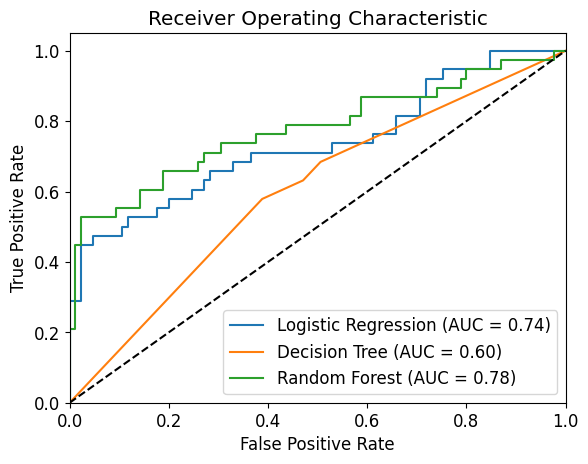

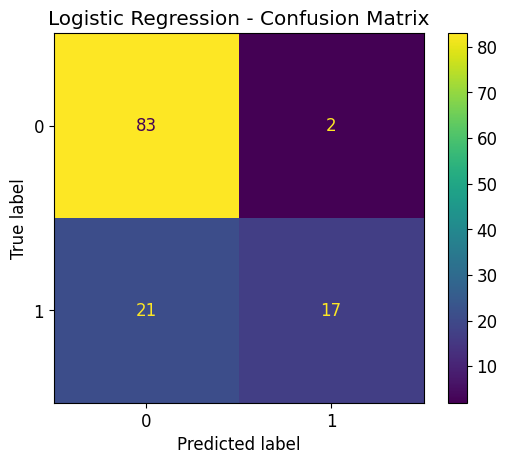

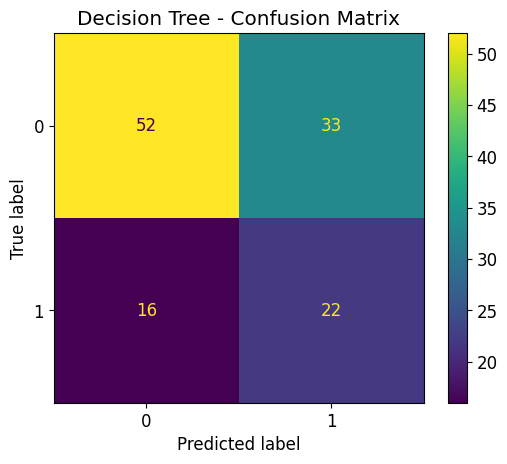

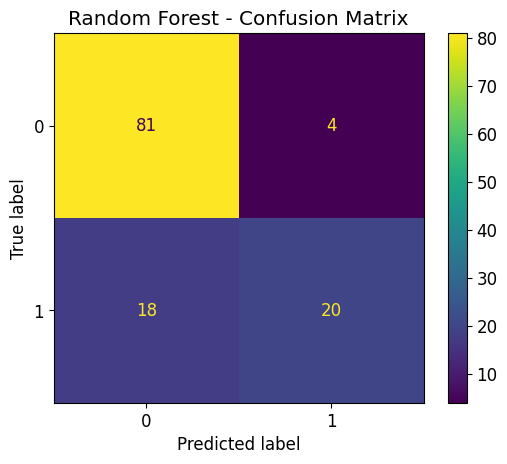

In [72]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, ConfusionMatrixDisplay

# Definir los modelos
models = {
    'Logistic Regression': LogisticRegression(C=0.1, solver='liblinear', random_state=seed),
    'Decision Tree': DecisionTreeClassifier(max_depth=20, min_samples_split=5, min_samples_leaf=2, random_state=seed),
    'Random Forest': RandomForestClassifier(n_estimators=200, max_depth=20, min_samples_split=5, min_samples_leaf=2, random_state=seed)
}

# Entrenar, predecir y evaluar cada modelo
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]
    
    accuracy = accuracy_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_prob)
    
    print(f"{name} -> Accuracy: {accuracy:.4f} -> AUC: {auc:.4f}")

    # Curva ROC
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

# Matrices de confusion
for name, model in models.items():
    disp = ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)
    disp.ax_.set_title(f'{name} - Confusion Matrix')
    plt.show()

## Modelo Seleccionado

Con base en las evaluaciones anteriores, el modelo de Random Forest se destaca como la mejor opción para la predicción de aprobación de préstamos. A continuación, se detallan las razones por las cuales se selecciona este modelo:

* Rendimiento General: Random Forest presentó la mayor precisión (0.8211) y un AUC relativamente alto (0.7765) en la comparación final de modelos.


* Consistencia en Validación Cruzada: Aunque la Regresión Logística mostró un buen rendimiento, el modelo de Random Forest fue más consistente en sus resultados de validación cruzada con una mejor AUC promedio.

* Optimización de Hiperparámetros: Random Forest obtuvo la mejor puntuación AUC (0.7915) durante la optimización de hiperparámetros con GridSearchCV, indicando que es el modelo más adecuado cuando se ajustan correctamente sus parámetros.

### Analisis de Resultados del Modelo seleccionado

El modelo de Random Forest fue seleccionado por su rendimiento superior en la predicción de la aprobación de préstamos. Los resultados indican que el modelo tiene una precisión del 78%, lo cual es un buen indicador de su capacidad para realizar predicciones precisas. Además, el modelo predice que aproximadamente el 21.95% de los solicitantes serán aprobados para el préstamo, mientras que el 78.05% no lo serán. Esto refleja una distribución esperada en escenarios donde los criterios para la aprobación son estrictos. La alta precisión del modelo sugiere que puede ser utilizado con confianza en un entorno de producción para ayudar en el proceso de toma de decisiones relacionadas con la aprobación de préstamos.

In [74]:
# Ejemplo de Random Forest
best_model = RandomForestClassifier(max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=100, random_state=seed)
best_model.fit(X_train, y_train)
pred_rfc = best_model.predict(X_test)

# Solidificando - Análisis de Resultados
cantidad_total = len(pred_rfc)
cantidad_aprobados = sum(pred_rfc == 1)
cantidad_no_aprobados = sum(pred_rfc == 0)

porcentaje_aprobados = round((cantidad_aprobados / cantidad_total) * 100, 2)
porcentaje_no_aprobados = round((cantidad_no_aprobados / cantidad_total) * 100, 2)

print("Porcentaje de personas que aprueban el préstamo:", porcentaje_aprobados, "%")
print("Porcentaje de personas que no aprueban el préstamo:", porcentaje_no_aprobados, "%")

aciertos = sum(pred_rfc == y_test)
porcentaje_aciertos = round((aciertos / cantidad_total) * 100)

print("Porcentaje total de aciertos:", porcentaje_aciertos, "%")

Porcentaje de personas que aprueban el préstamo: 21.95 %
Porcentaje de personas que no aprueban el préstamo: 78.05 %
Porcentaje total de aciertos: 78 %
